In [49]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [50]:
conn=mysql.connector.connect(user='root',password='newpass123',host='localhost',database='shares')

In [51]:
mycursor=conn.cursor()

In [52]:
PriceHVolumeH="select b.symbol,last,(last-open)/open*100,b.tradedqty, v.avgvolume from shares.bhavdata b,shares.volumeAvgs v where date > curdate() -2 and (last-open)/open*100 > 1 and b.tradedqty > v.avgvolume * 1.5 and b.symbol = v.symbol and b.last > v.HIGH and tradedqty > 100000 order by tradedqty desc"

In [122]:
allbhavdata="select symbol,last,tradedqty from shares.bhavdata"

In [123]:
mycursor.execute(allbhavdata)

In [124]:
 rows=mycursor.fetchall()

In [130]:
pdata =pd.DataFrame(rows)
pdata.reindex([1])
pdata.columns= ["symbol","price","todayqty"]
pdata.groupby('symbol').agg(['min','max','mean'])

price                         todayqty                        
                 min       max          mean      min       max          mean
symbol                                                                       
20MICRONS      34.35     43.50     39.094805    11460    692253  6.518742e+04
3IINFOTECH      3.75      5.50      4.529221   358857  20157058  3.087437e+06
3MINDIA     11281.00  14095.00  13391.242857       49     54248  2.478143e+03
63MOONS        55.20     77.00     66.482468    14629    775098  6.537740e+04
8KMILES       484.00    624.00    554.692208    12769    768756  1.106452e+05
A2ZINFRA       35.15     49.05     42.562987   168364   3005870  7.198152e+05
AARTIDRUGS    481.00    567.00    529.830519     2036     52903  1.101217e+04
AARTIIND      820.00    990.00    911.483766    10103    592602  6.135882e+04
AARVEEDEN      29.40     72.45     61.657143     2019    866378  5.428483e+04
ABAN          162.40    224.00    191.090909    96687   9838882  8.190019e+05
ABB          1331.55   1618.00   1452.482468     6354   1484320  1.179325e+05
ABBOTINDIA   4026.00   4550.00   4286.151299      717     13373  3.132468e+03
ABFRL         158.70    185.00    172.996104    53520   3521739  4.908191e+05
ABIRLANUVO   1592.05   1917.00   1699.017778    76642   1885811  3.861848e+05
ACC          1569.85   1818.45   1678.087662    58983   2131367  4.194969e+05
ACCELYA      1291.00   1484.90   1382.980519      432     23515  4.049286e+03
ACE            60.05     75.10     67.516883    61840   3498567  3.463556e+05
ADANIENT      111.50    141.90    127.733117   619714  37683895  7.287911e+06
ADANIPORTS    327.15    415.50    368.777922   860478  12190256  3.766570e+06
ADANIPOWER     26.55     34.95     29.737013  2666848  39322702  9.118317e+06
ADANITRANS     72.45    133.40    114.630519    58548   5877272  1.234093e+06
ADFFOODS      206.00    307.90    259.940260    13865   3753301  3.933105e+05
ADHUNIK         4.35      6.95      5.898052     3090   1049696  1.267353e+05
ADHUNIKIND     95.80    115.00    102.868116    28788    858675  1.293631e+05
ADLABS         56.45     88.40     74.811039   101798   3434823  4.302533e+05
ADORWELD      315.00    401.85    362.134416      439    687139  2.085556e+04
ADVANIHOTR     53.00     69.20     59.585065      885    459414  2.279645e+04
ADVENZYMES    278.90   2071.00    697.637662    24200   1793817  2.254879e+05
AEGISCHEM     176.05    215.00    192.094805    48571   2284179  2.412417e+05
AGCNET        103.00    152.00    116.577500     1424   1010461  1.140127e+05
...              ...       ...           ...      ...       ...           ...
WENDT        2072.50   2770.00   2333.895455       16      7615  6.902727e+02
WHEELS       1263.15   1480.00   1358.316883      185     56783  2.680052e+03
WHIRLPOOL    1105.70   1229.70   1161.163636     4191   1646200  6.274287e+04
WILLAMAGOR     80.50     95.90     88.135714    30127    491194  1.297083e+05
WINDMACHIN     52.50     67.00     58.079221      267    355919  2.800688e+04
WINSOME         1.75      2.00      1.914286      101    612514  5.599600e+04
WIPRO         254.10    560.00    370.505844   510545  16392253  2.412689e+06
WOCKPHARMA    553.00    714.15    619.565584   165830   3530020  8.378964e+05
WONDERLA      336.15    392.00    364.916234     5655    155816  2.691191e+04
WSI             7.45     13.20      9.490217      101    245061  2.708130e+04
WSTCSTPAPR    172.00    207.50    195.255195     9779   1308555  1.498570e+05
XCHANGING      48.30     64.10     57.793506     1059   1117925  7.232392e+04
XLENERGY        1.50      2.80      2.122464       48     18074  2.552377e+03
XPROINDIA      44.50     52.90     49.590909      458     91840  1.073861e+04
YESBANK      1397.55   1844.95   1560.829221   315651  11808681  2.709464e+06
ZANDUREALT   1171.80   1429.45   1309.075974      205    116582  4.970974e+03
ZEEL          484.10    556.50    518.779221   316627   7628233  2.130144e+06
ZEELEARN       39.25     47.15     44

In [44]:
WhichShare="BEML"

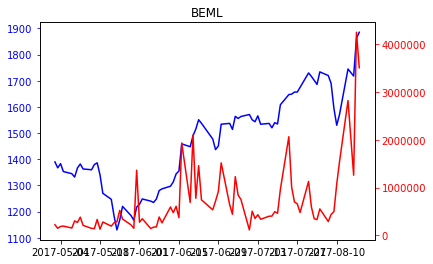

In [45]:
mycursor.execute("select tradedqty,nooftrades,last,date from shares.bhavdata where symbol =\'"+WhichShare+"\'")
rows=mycursor.fetchall()
volumeData=np.array(rows)
dates=volumeData[:,3]
fig, ax1 = pp.subplots()
ax1.plot(dates, volumeData[:,2], 'b-')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(dates, volumeData[:,0], 'r-')
ax2.tick_params('y', colors='r')
pp.title(WhichShare)
pp.show()